#### <font color=#8B0000>Problem B3: Pendulum in Viscous Medium [18 marks]</font>

The motion of a damped harmonic oscillator can be described by the following equation / model:
$$y(t) = Ae^{-\gamma t} \cos{(\omega t + \phi)}$$

where:
- $y(x)$ is the displacement
- $A$ is the initial amplitude
- $\gamma$ is the damping coefficient related to the viscosity of the medium
- $\omega$ is the angular frequency related to the length of the pendulum and gravitational acceleration
- $\phi$ is the phase shift
- $t$ is time

This equation represents a common non-linear physical system where fitting involves estimating parameters like $A$, $\gamma$ and $\omega$. In this question, let's look at a **pendulum oscillating in a viscous fluid, experiencing damping due to the fluid's resistance. The displacement $y(t)$ of the pendulum from its equilibrium position is governed by the equation above. Our goal is to analyze the motion given by a set of data and extra physical parameters from noisy experimental data.

You are provided with experimental data for time $t$, displacement $y(x)$, and uncertainty in displacement $\sigma_y$. Your task is to:
1. **[2 marks]** Import `PendulumViscousMedium.txt` using any method you prefer. Plot the experimental data using `plt.scatter` and the errorbars using `plt.errorbar` and label the plot appropriately with title and labels
2. **[2 marks]** You *must* use `scipy.optimize.curve_fit` to fit the data to the provided model. Which fitting method did you choose (least squares, chi-squared) and why? Provide some initial guesses for each of the parameters to help start the fit.
3. **[1 mark]** Present the optimal parameter values of $A$, $\gamma$, $\omega$ and $\phi$ and their errors.
4. **[4 marks]** Overlay the fitted model onto the original data and calculate the $R^2$ score. Discuss how well it describes the observed motion for full marks and assume a threshold of 0.85 as a "good fit".
5. **[4 marks]** Numerically compute the slope ($dy/dt$) of the fitted model at $t_1 = 2.0$ s and $t_2 = 10.0$ s and then find a way (any way) to plot a short tangent line at these two points on the same graph. The tangent line needs to be short so it is not distracting, and also be a dotted line so that it is different than the rest.
6. **[5 marks]** Looking only at the amplitude decay equation $(A(t) = Ae^{-\gamma t})$ compute the half-life by solving for $t_{0.5}$, the time at which the amplitude decreases to half its initial value. You cannot solve this on paper; find a way to solve for $t_{0.5}$ computationally and show your code (you may use `sympy` or `numpy` to solve the equation and one will be much easier). Present the value of $t_{0.5}$ and explain what this value means within the context of the question for full marks, and how the $\gamma$ value affects this half-life value.


I am choosing to fit ths data using chi-squared since this data has a lot of uncertainies,
which least squares wouldn't have take in account otherwise

The Optimal Parameters are the following:

 A = 4.52 +- 0.49 in units of length 
 γ = 0.19 +- 0.03
 ω = 2.50 +- 0.03 in units of Hz
 ϕ = 0.53 +- 0.10

R^2 Score Analysis:

R^2 for the Chi-Squared Fit is: 0.876 which is above the good fit threshold, 0.85.
Therefore, we conclude that this fit is indeed a good fit
We can also see the parameters, A, γ, ω, ϕ are qualitatively consistent with the sketch!

These are the approximate instantaneous rates of change of the fitted model at t = 2.0s and t = 10.0s respectively:

 y'(2) = 4.913
 y'(10) = -0.765

The half-life for the amplitude is: 3.687 seconds


Explanation of The Half-Life:

The half-life, t = 3.687 seconds gives us information about the amount of time it takes for the amplitude of our pedulum,
oscillating in a viscous medium, to decrease to half of its inital value (value at t = 0 

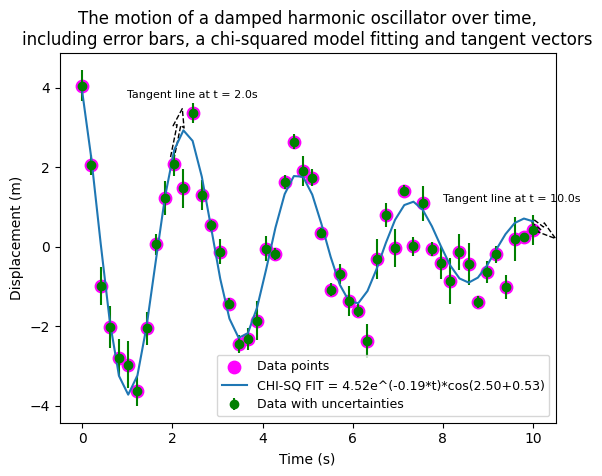

In [3]:
# Please enter your solution here. Please try and be neat with you work and comment properly.
import numpy as np 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sympy as sp
from sympy import *
from sympy.abc import t

## NOTEE FOR TA: There is a lot printed from this cell, some parts like explanations, or the graph may be truncated. Please take that into account when grading! 

##LOAD DATA

figure = plt.figure()
ax = figure.add_subplot(111)

data = np.loadtxt("PendulumViscousMedium.txt", delimiter=',', skiprows=1)
time_ticks = np.array([])
displacement_data = np.array([])
uncertainties = np.array([])


# CREATE ARRAYS FOR TIME AND DISPLACEMENT #

for measurement in data: 
    time_ticks = np.append(time_ticks, measurement[0])
    displacement_data =  np.append(displacement_data, measurement[1])
    uncertainties = np.append(uncertainties, measurement[2])

#PLOT ORIGINAL DATA 
plt.scatter(time_ticks, displacement_data, s=80, color='magenta', label="Data points")

plt.title("The motion of a damped harmonic oscillator over time,\nincluding error bars, a chi-squared model fitting and tangent vectors")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")

plt.errorbar(time_ticks, displacement_data, yerr=uncertainties, fmt='o', label='Data with uncertainties', color='g')


## 2. CHI-SQUARED FITTING ##

print("\nI am choosing to fit ths data using chi-squared since this data has a lot of uncertainies,\nwhich least squares wouldn't have take in account otherwise\n")

def fit_model(t, A, gamma, omega, phi): 
    return A * np.exp(-gamma * t) * np.cos(omega * t + phi)


optP, covP = curve_fit(fit_model, time_ticks, displacement_data, sigma=uncertainties, p0=[4,0.1,0.33,0])

Afit, gammafit, omega_fit, phi_fit = optP # optimized parameters amplitude, gamma, omega, phi

fitErrors = np.sqrt(np.diag(covP))   # uncertainties in fitted parameters

t_fit = np.linspace(0,  max(time_ticks), 50)

chi_squared_fit = fit_model(t_fit, Afit, gammafit, omega_fit, phi_fit)

## STORING PARAMETERS FOR CONVENIENCE ##

A = optP[0]
gammaparam = optP[1]
omega = optP[2]
phi = optP[3]

### OVERLAYING FIT ONTO ORIGINAL SCATTER AND ERROR BARS 

plt.plot(t_fit, chi_squared_fit, label=f"CHI-SQ FIT = {optP[0]:.2f}e^({-optP[1]:.2f}*t)*cos({optP[2]:.2f}+{optP[3]:.2f})")

print(f"The Optimal Parameters are the following:\n\n A = {A:.2f} +- {fitErrors[0]:.2f} in units of length \n γ = {gammaparam:.2f} +- {fitErrors[1]:.2f}\n\
 ω = {omega:.2f} +- {fitErrors[2]:.2f} in units of Hz\n ϕ = {phi:.2f} +- {fitErrors[3]:.2f}")

####### QUESTION 3 R^2 Assessment ##########

r2 = r2_score(displacement_data, chi_squared_fit)
print(f"""\nR^2 Score Analysis:\n\nR^2 for the Chi-Squared Fit is: {r2:.3f} which is above the good fit threshold, 0.85.\nTherefore, we conclude that this fit is indeed a good fit\nWe can also see the parameters, A, γ, ω, ϕ are qualitatively consistent with the sketch!\n""")

#### QUESTION 4 TANGENT VECTORS ###### 

def model(t):
    return Afit * np.exp(-gammafit * t) * np.cos(omega_fit * t + phi_fit)


### Define derivative approximation function ###

def derivative_approx(f,x,h):

    """Numerically approximates the instaneous rate of change (derivative) of a differentiable function, f at a point x. 
    Requires h =/ 0 and h < 0.20, for a reasonable approximation"""

    return (f(x+h) - f(x)) /h


# Print instantaneous rates of changes

print(f"These are the approximate instantaneous rates of change of the fitted model at t = 2.0s and t = 10.0s respectively:\n\n y'(2) = {derivative_approx(model,2,0.00001):.3f}\n y'(10) = {derivative_approx(model,10,0.00001):.3f}\n")


# Function to return the tangent vector at the point 

def find_tangent_vector(m):

    """This function consumes a slope and forms a tangent vector, representing the rate of change in y and x."""
    return(np.array([1,m]))

# Define Instaneous slopes at t = 2 and t = 10:

slope_at_2 = derivative_approx(model,2,0.00001)
slope_at_10 = derivative_approx(model,10,0.00001)

# Plot tangent vectors dashed using ax, since plt doesn't support dashed vectors: 

ax.quiver(2, model(2), find_tangent_vector(slope_at_2)[0], find_tangent_vector(slope_at_2)[1], scale=50, linestyle='dashed', facecolor='none', linewidth=1)

# Label vector 1 
plt.text(1.0, model(2)+1.5, "Tangent line at t = 2.0s",fontsize=8)

ax.quiver(10, model(10), find_tangent_vector(slope_at_10)[0], find_tangent_vector(slope_at_10)[1], scale=22, linestyle='dashed', facecolor= 'none', linewidth=1)

# Label vector 2
plt.text(8, model(10)+0.5, "Tangent line at t = 10.0s",fontsize=8)



#### HALF LIFE QUESTION #####: 

## Ampltitude is initially 4.52. We need to solve for the time when the amplitude drops to 1/2(4.52)!

## So, we're solving e**(-gamma*t) = 1/2

# redefine gammaparam as itself, but rounded
gammaparam = np.round(gammafit,3) 

#DEFINE t AS A SYMBOL, ENSURE WE ONLY GET REAL SOLUTIONS, by setting real=True: 

t = sp.Symbol('t', real=True)

def compute_half_life(decay_constant): 
    return sp.solve(sp.Eq(sp.exp(-decay_constant* t), 1/2))[0]

half_life = compute_half_life(gammaparam)
print(f"The half-life for the amplitude is: {half_life:.3f} seconds")


##EXPLANAING DECAY CONSTANT AND EXPLANAING HALF LIFE SIGNIFICANCE 


print(f"""\n\nExplanation of The Half-Life:\n\nThe half-life, t = {half_life:.3f} seconds gives us information about the amount of time it takes for the amplitude of our pedulum,\noscillating in a viscous medium, to decrease to half of its inital value (value at t = 0 s).\nMeaning, it takes, {half_life:.3f} seconds for the amplitude of this pendulum to decay from its original amplitude, {Afit:.2f} to half of that, {(1/2*Afit):.2f}""")

print(f"""\n\n Explanation of the decay constant:\n\nThe decay constant, gamma = {gammaparam} is inversely proportional  to the half-life for our pendulum.\nMeaning, If we increase gamma, the half-life of our pendulum will go down, (decays faster) and if we decrease gamma, the half-life of our pendulum will increase, (decay slower)

""")

### SHOWING PLOT AND ADJUSTING LEGEND FOR VISUAL APPEAL 

plt.legend(loc="lower right", frameon=True, fontsize=9)
plt.show()